In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Wczytanie pliku

df = pd.read_csv('HRDataset.csv')

df.head()

In [2]:
df = pd.read_csv('HRDataset.csv')

df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


Zmianę formatu dat też można zrobić przy wczytywaniu tabeli z pliku ale u mnie nie da sięzrobićtego bo daty występują w dwóch formatach. Można to zrobićw następujący sposób:

mydateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H:%M:%S")

df = pd.read_csv("file.csv", sep='\t', names=['date_column', 'other_column'], parse_dates=['date_column'], date_parser=mydateparser)

Źródło:

riptutorial.com/pandas/example/8458/parsing-date-columns-with-read-csv

Ja u siebie muszę zastosować takie przekształcenie dla każdej kolumny osobno:

df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

Ponieważ %y odpowiada takiemy zapisowi roku: 88, a %Y takiemu zapisowi roku: 1988.

In [3]:
df.ManagerName.unique()

array(['Brandon R. LeBlanc', 'John Smith', 'Lynn Daneault',
       'Brian Champaigne', 'Jennifer Zamora', 'Janet King', 'Simon Roup',
       'Eric Dougall', 'Peter Monroe', 'Board of Directors', 'Amy Dunn',
       'Brannon Miller', 'David Stanley', 'Elijiah Gray', 'Kelley Spirea',
       'Ketsia Liebig', 'Kissy Sullivan', 'Michael Albert',
       'Webster Butler', 'Debra Houlihan', 'Alex Sweetwater', nan],
      dtype=object)

<AxesSubplot:xlabel='ManagerID', ylabel='Density'>

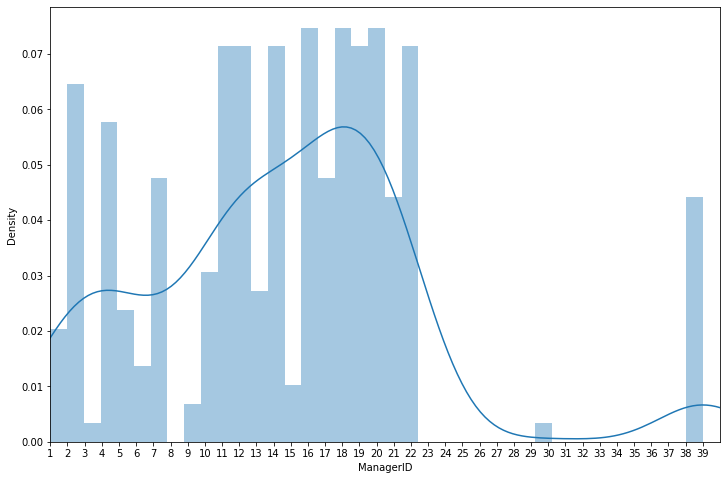

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.set_xlim(1,40)
ax.set_xticks(range(1,40))
sns.distplot(df['ManagerID'], ax=ax, bins=39)

In [5]:
diagram = sns.jointplot(x='ManagerID',y='PerformanceScore',data=df, height=10, kind='hist', bins=39)
diagram.ax_joint.set_xticks(range(1,40))
diagram

ConversionError: Failed to convert value(s) to axis units: 0      Fully Meets
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
396            NaN
397            NaN
398            NaN
399            NaN
400            NaN
Name: y, Length: 401, dtype: object

Z analizy powyższego histogramu można stwierdzić, iż to jakiego pracownik ma bezpośredniego przełożonego może zależeć jego ocena wydajności pracy. Widać wyraźnie, że praca pod okiem niektórych managerów może przynieść lepsze rezultaty w wydajności pracy.